# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

#work_dir = '/home/ubuntu/'

#os.chdir(work_dir)



import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks


In [16]:
#file = '10000sims_17params_05_04_nsf_threshold'
file = '10000sims_17params_13_04_nsf_threshold_ratio'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/results
/home/ubuntu/results


In [8]:
obs_real_stat = posterior.default_x

In [9]:

samples = posterior.sample((1000,), not_within_prior=True)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


acceptance rate:  1.0


In [10]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [11]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(torch.nn.functional.relu(list_min - diff))
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-4.5912e-01,  4.8991e-04, -3.2366e-01, -7.3412e-02, -2.2698e-02,
         2.5522e+01, -6.8935e-07, -4.4748e-03, -8.1497e-03, -1.3556e-02,
        -5.7034e-03,  5.7475e+01, -7.8946e-02, -9.5506e-02, -1.1657e-02,
         1.9760e-03,  1.1885e+02])
tensor([8.9551e-01, 1.9062e-01, 2.6795e+00, 9.8199e-01, 3.0930e-02, 2.8256e+01,
        4.2428e-05, 3.9447e-02, 2.5972e-02, 4.8327e-01, 1.5505e-01, 6.6915e+01,
        8.6919e+00, 4.1849e+00, 1.0026e+00, 1.0056e+00, 1.5972e+02])
tensor([4.0639e-01, 5.7041e-02, 9.0096e-01, 3.1662e-01, 1.6088e-02, 8.2035e-01,
        1.2935e-05, 1.3177e-02, 1.0236e-02, 1.4905e-01, 4.8226e-02, 2.8320e+00,
        2.6313e+00, 1.2841e+00, 3.0428e-01, 3.0110e-01, 1.2261e+01])


In [12]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

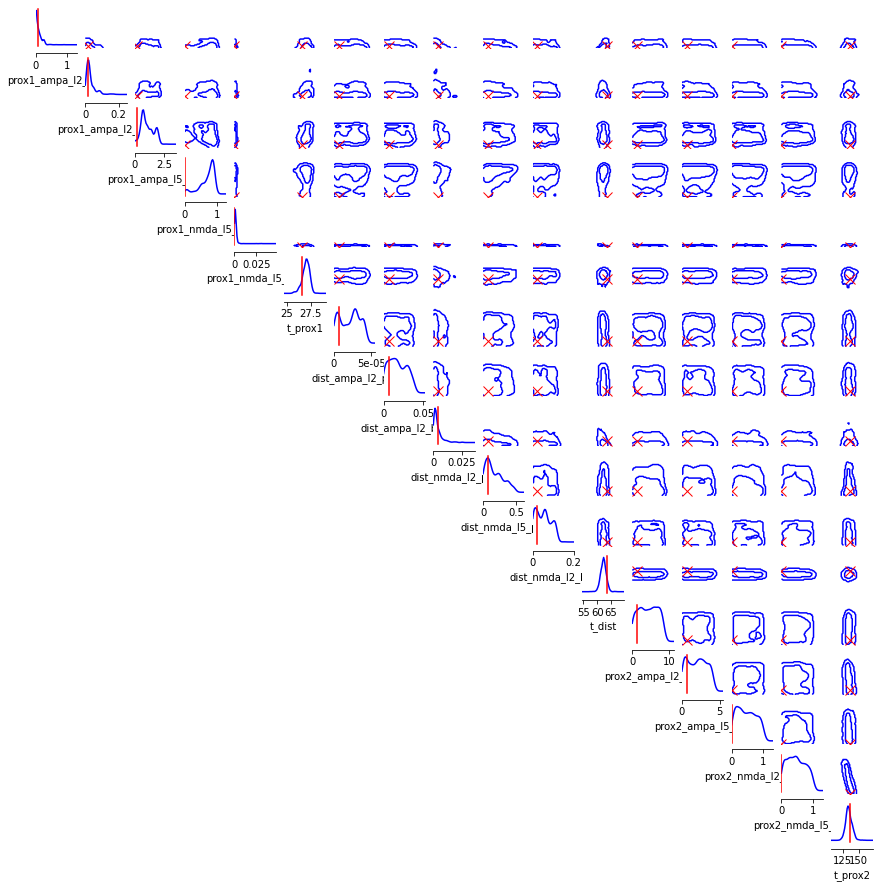

In [13]:
_ = analysis.pairplot(
    samples = [samples],
    points = [true_params_threshold],
    limits = limits,
    points_colors='red',
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.8, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.02,
    points_offdiag={"markersize": 10, 'marker': 'x' },
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#0000ff', '#00b300'],
)

<Figure size 432x288 with 0 Axes>

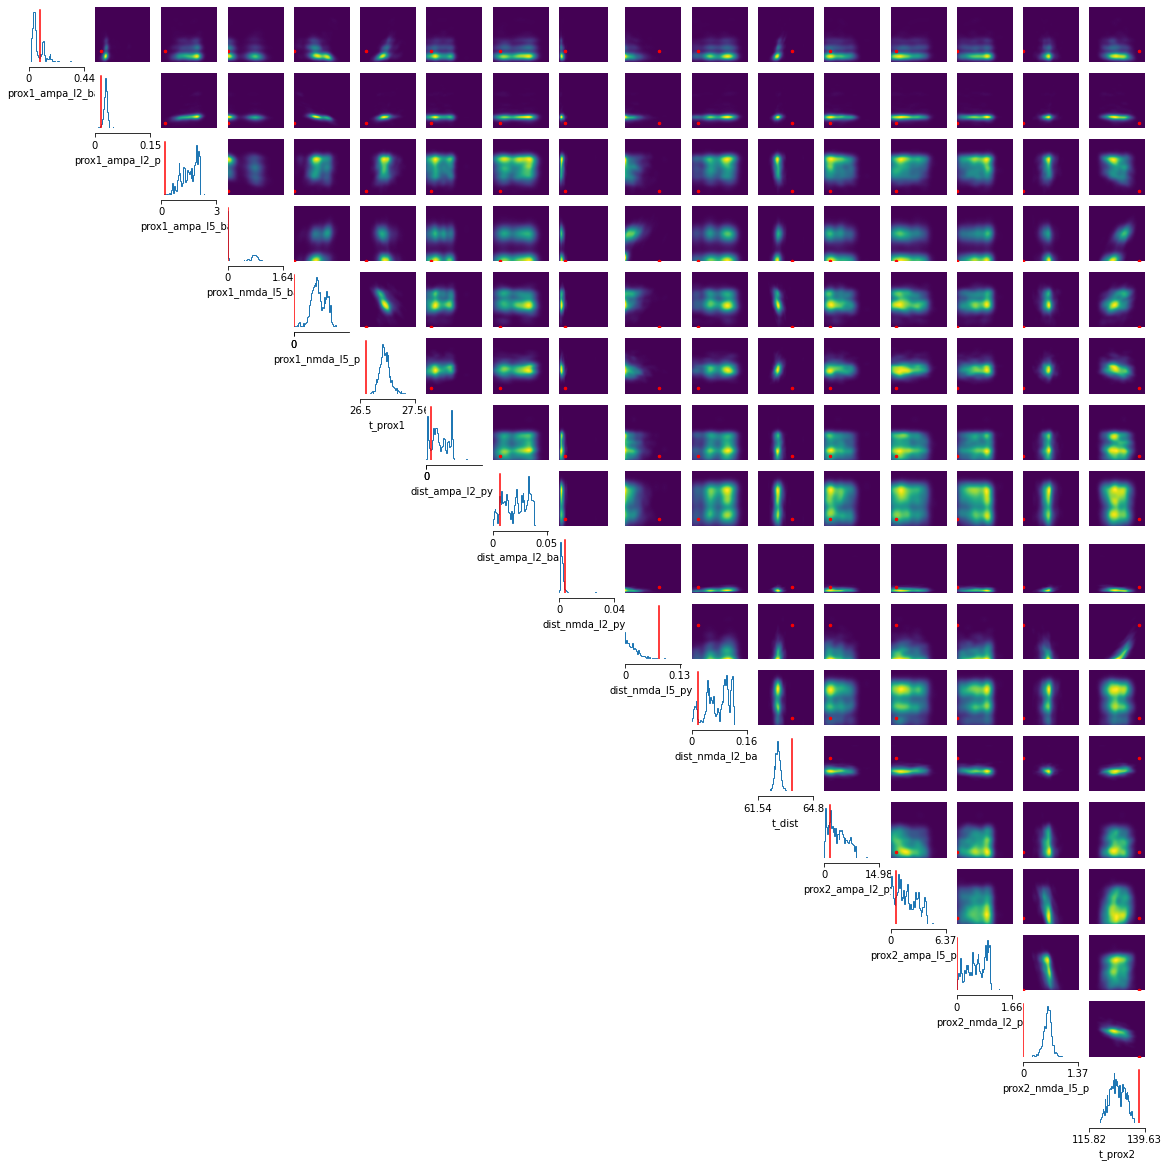

In [16]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params_threshold,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

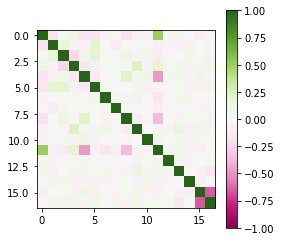

In [67]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [56]:
cond_coeff_mat_list = []

for i in range(5):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
    

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0
acceptance rate:  1.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


KeyboardInterrupt: 

In [20]:
len(cond_coeff_mat_list[1])

17

In [21]:
    
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)

In [22]:
cond_coeff_mat_tensor.shape

torch.Size([5, 17, 17])

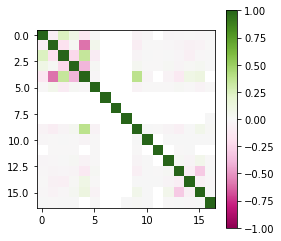

In [23]:
#take average:
cond_coeff_mat_av = torch.mean(cond_coeff_mat_tensor, dim=0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [24]:
cond_coeff_mat

tensor([[ 1.0000e+00, -1.3097e-01,  1.4117e-01,  7.1195e-02, -3.1984e-01,
          4.1067e-02,         nan,         inf,         inf, -6.4258e-03,
         -5.2651e-04,  1.5104e-03, -1.3313e-02, -1.6014e-02, -1.5755e-02,
         -1.6486e-02, -9.1607e-04],
        [-1.3097e-01,  1.0000e+00, -2.5495e-01,  1.2579e-01, -9.1215e-01,
          2.2209e-01,         nan,        -inf,         inf, -1.8427e-01,
          5.3912e-03, -2.6635e-02,  1.8015e-02, -6.5367e-02, -1.6494e-01,
          8.8977e-02, -1.3851e-03],
        [ 1.4117e-01, -2.5495e-01,  1.0000e+00, -3.2134e-01,  7.9215e-01,
         -4.6486e-01,         nan,        -inf,         nan,  6.4253e-03,
          8.3216e-04, -3.0302e-02, -4.9164e-03, -8.6456e-02, -7.8470e-02,
          5.0228e-03,  1.0592e-02],
        [ 7.1195e-02,  1.2579e-01, -3.2134e-01,  1.0000e+00, -7.7505e-01,
          2.7787e-02,         nan,         nan,  4.5412e-02,  3.9282e-02,
          9.7962e-03, -1.0022e-02,  3.8304e-03, -4.8832e-02, -1.5575e-02,
    

In [9]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

true_params_supra = torch.tensor([0.08831, 0.01525,  0.19934, 0, 0, 26.61, 0, 0, 0, 0, 0, 63.53,
                                 1.43884, 0.684013, 0, 0, 137.12])

In [17]:
#file = '10000sims_17params_11_04_nsf_supra_ratio'
#file = '10000sims_17params_24_04_nsf_supra_0_std'
#file = '10000sims_17params_28_04_nsf_No'
file = '10000sims_17params_01_05_nsf_No'

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

FileNotFoundError: [Errno 2] No such file or directory: '10000sims_17params_01_05_nsf_No/posterior.pt'

NameError: name 'obs_real2' is not defined

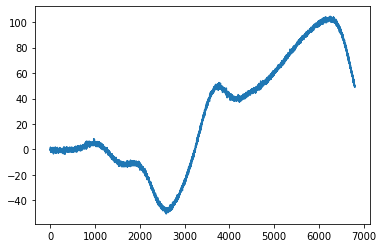

In [15]:
plt.plot(obs_real)
plt.plot(obs_real2, label = 'no')
plt.legend()

In [34]:
samples_no = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [57]:
##better limits:

list_min = torch.min(torch.cat((samples_no, samples), dim=0), 0)[0]
list_max = torch.max(torch.cat((samples_no, samples), dim=0), 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.2

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-9.5155e-03, -4.7425e-02, -3.0305e-01, -2.2908e-01, -3.0241e-02,
         1.4074e+01, -8.6654e-07, -1.2072e-02, -2.9335e-04, -1.5587e-02,
        -2.9133e-02,  5.8878e+01, -8.4974e-02, -2.4536e-01, -2.6531e-02,
        -1.2180e-01,  1.0940e+02])
tensor([8.8437e-01, 2.0855e-01, 2.1393e+00, 9.8534e-01, 5.4928e-02, 3.3213e+01,
        5.6026e-05, 4.7831e-02, 3.4473e-02, 4.9187e-01, 1.1930e-01, 7.4999e+01,
        8.6675e+00, 4.1229e+00, 1.0020e+00, 1.0046e+00, 1.6452e+02])
tensor([1.7878e-01, 5.1194e-02, 4.8846e-01, 2.4288e-01, 1.7034e-02, 3.8279e+00,
        1.1378e-05, 1.1981e-02, 6.9533e-03, 1.0149e-01, 2.9686e-02, 3.2243e+00,
        1.7505e+00, 8.7366e-01, 2.0572e-01, 2.2528e-01, 1.1022e+01])


In [58]:
list_max2 = torch.cat((true_params_no.unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params_no.unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]

In [42]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

In [54]:
true_params_no = torch.tensor([0.05551, 0.01075,  0.20281, 0, 0, 40.6, 2.07922, 6.28, 0, 0, 0, 72.1,
                                 0.05121, 0.37517, 0, 0, 144.7])
#limits = [list(tup) for tup in zip(prior_min, prior_max)]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],


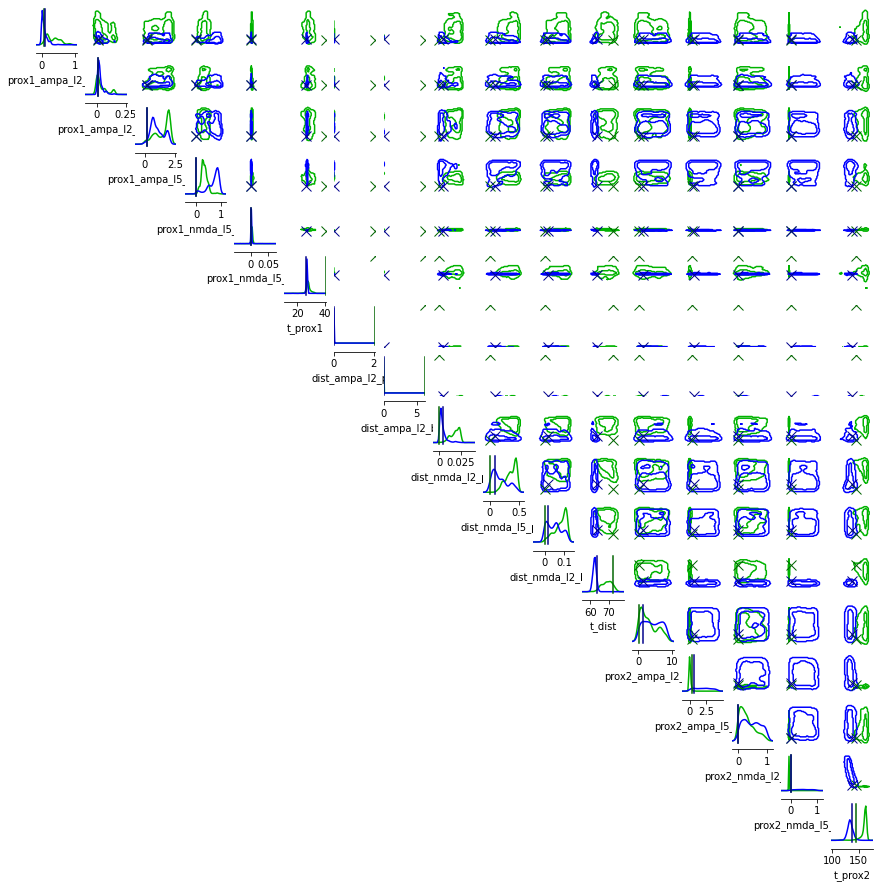

In [66]:
_ = analysis.pairplot(
    samples = [samples_no, samples],
    points = [true_params_no, true_params_threshold],
    limits = limits,
    points_colors=['darkgreen','darkblue'],
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    #subset=[0,1,2,3,4,8,9,10,11,12,13,14,15,16],
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.9, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.9,
    points_offdiag={"markersize": 10, 'marker': 'x' },
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#00b300', '#0000ff'],
)

In [26]:
list_max2 = torch.cat((true_params_supra.unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params_supra.unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]

In [28]:
limits

[[tensor(0.0883), tensor(1.1343)],
 [tensor(0.0153), tensor(0.2432)],
 [tensor(0.1993), tensor(2.5703)],
 [tensor(0.), tensor(1.0912)],
 [tensor(-0.1160), tensor(0.1635)],
 [tensor(26.0902), tensor(29.3438)],
 [tensor(-1.2013e-05), tensor(4.3024e-05)],
 [tensor(0.), tensor(0.0479)],
 [tensor(-0.0082), tensor(0.0122)],
 [tensor(-0.1057), tensor(0.7502)],
 [tensor(0.), tensor(0.1196)],
 [tensor(55.2443), tensor(64.6107)],
 [tensor(-0.7425), tensor(9.3581)],
 [tensor(-0.6619), tensor(5.1119)],
 [tensor(-0.2483), tensor(1.3602)],
 [tensor(0.), tensor(1.2756)],
 [tensor(113.3185), tensor(159.9564)]]

<Figure size 432x288 with 0 Axes>

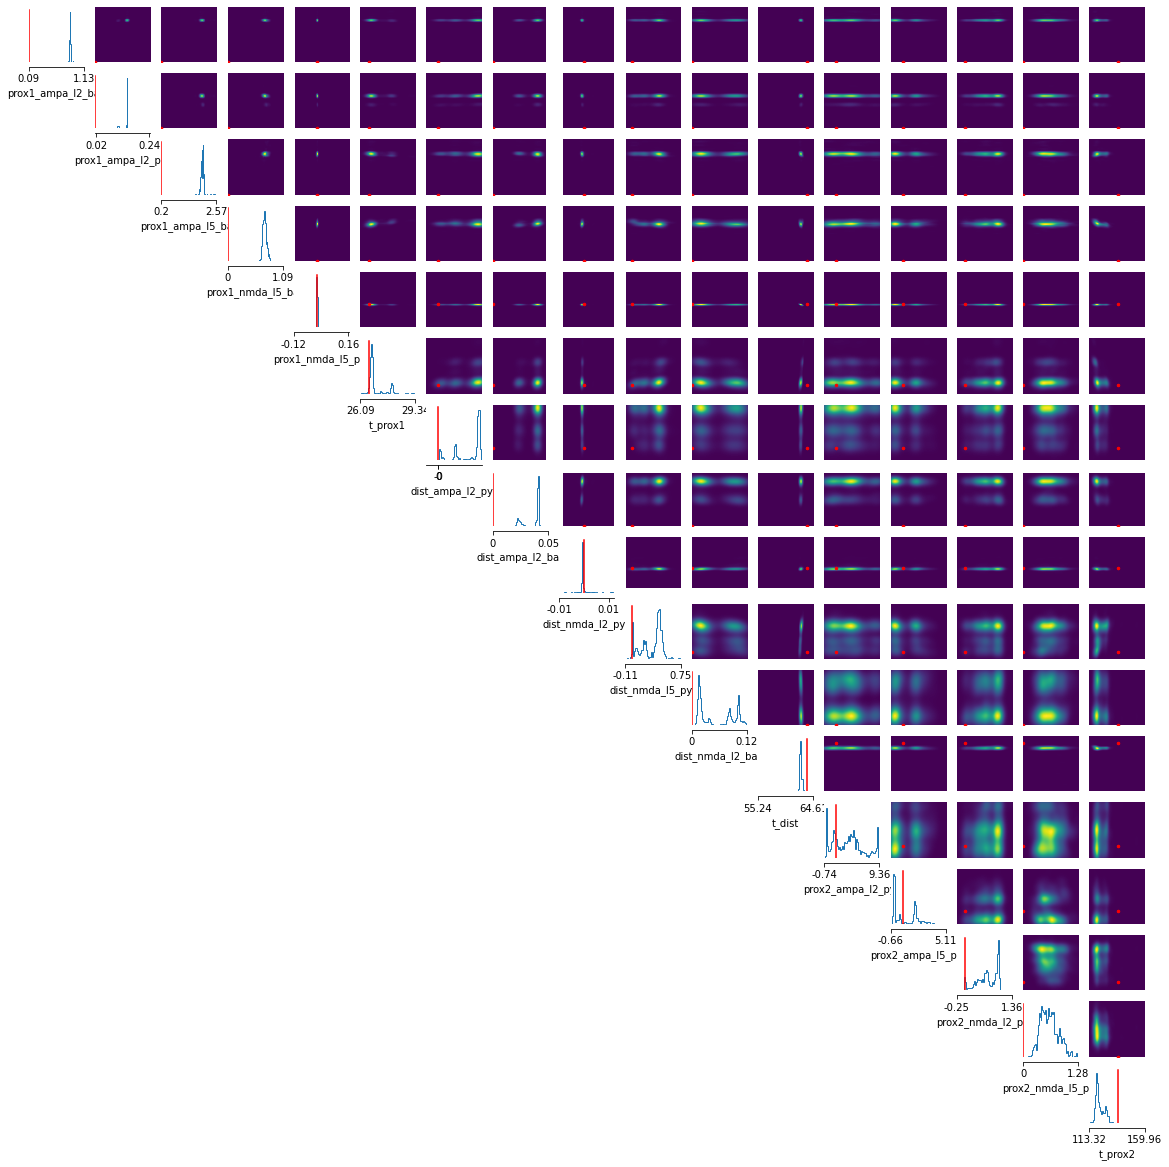

In [29]:
plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples_supra,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params_supra,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)

